In [1]:
import sys
import math
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [2]:
df = pd.read_csv ('data_before_normazised.csv',encoding='utf-8-sig')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('CA', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)
df.drop('month', axis=1, inplace=True)
df.drop('median_dom', axis=1, inplace=True)

In [3]:
# for column in df.columns:
#     print(column)
df.head()

,city,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,...,42200,42220,43760,44700,45000,46020,46380,46700,47300,49700
0,1124,180000.0,125800.00000,102.564103,90.752462,19,10.000000,6.000000,16.000000,0.800000,...,0,0,0,0,0,0,0,0,0,0
1,426,477500.0,600000.00000,528.221778,524.475525,2,1.000000,1.000000,1.000000,0.500000,...,0,0,0,0,0,0,0,0,0,0
2,360,450000.0,694801.66751,300.000000,428.895978,1,10.026163,12.991399,26.321098,3.077924,...,0,0,0,0,0,0,0,0,0,0
3,1306,295000.0,250000.00000,185.897436,175.606641,3,10.026163,1.000000,3.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
4,487,895000.0,579900.00000,382.910117,285.946746,3,3.000000,1.000000,1.000000,0.300000,...,0,0,0,0,0,0,0,1,0,0


In [4]:
#Apply L2 Norm...
col=['median_sale_price', 'median_list_price', 'median_ppsf',
       'median_list_ppsf', 'homes_sold', 'pending_sales', 'new_listings',
       'inventory', 'months_of_supply', 'avg_sale_to_list',
       'sold_above_list', 'price_drops', 'off_market_in_two_weeks']
df[col] = preprocessing.normalize(df[col], norm='l2')

In [5]:
df.head()

,city,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,...,42200,42220,43760,44700,45000,46020,46380,46700,47300,49700
0,1124,0.819659,0.572851,0.000467,0.000413,0.000087,0.000046,2.732198e-05,7.285861e-05,3.642931e-06,...,0,0,0,0,0,0,0,0,0,0
1,426,0.622705,0.782456,0.000689,0.000684,0.000003,0.000001,1.304094e-06,1.304094e-06,6.520469e-07,...,0,0,0,0,0,0,0,0,0,0
2,360,0.543611,0.839337,0.000362,0.000518,0.000001,0.000012,1.569392e-05,3.179652e-05,3.718207e-06,...,0,0,0,0,0,0,0,0,0,0
3,1306,0.762895,0.646522,0.000481,0.000454,0.000008,0.000026,2.586086e-06,7.758259e-06,2.586086e-06,...,0,0,0,0,0,0,0,0,0,0
4,487,0.839235,0.543768,0.000359,0.000268,0.000003,0.000003,9.376931e-07,9.376931e-07,2.813079e-07,...,0,0,0,0,0,0,0,1,0,0


In [6]:
y = df['quality']
X = df.drop('quality',axis=1)
#, x_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=1)

In [7]:
X_train.columns

Index(['city', 'median_sale_price', 'median_list_price', 'median_ppsf',
       'median_list_ppsf', 'homes_sold', 'pending_sales', 'new_listings',
       'inventory', 'months_of_supply', 'avg_sale_to_list', 'sold_above_list',
       'price_drops', 'off_market_in_two_weeks', 'MORTGAGE30US',
       'PropertyType_All_Residential', 'PropertyType_Condo/Co-op',
       'PropertyType_Multi-Family(2-4 Unit)',
       'PropertyType_Single_Family_Residential', 'PropertyType_Townhouse ',
       'California', 'Anaheim', 'Bakersfield', 'Chico', 'Clearlake',
       'El Centro', 'Eureka', 'Fresno', 'Hanford', 'Los Angeles', 'Madera',
       'Merced', 'Modesto', 'Napa', 'Oakland', 'Oxnard', 'Red Bluff',
       'Redding', 'Riverside', 'Sacramento', 'Salinas', 'San Diego',
       'San Francisco', 'San Jose', 'San Luis Obispo', 'San Rafael',
       'Santa Cruz', 'Santa Maria', 'Santa Rosa', 'Sonora', 'Stockton',
       'Susanville', 'Truckee', 'Ukiah', 'Vallejo', 'Visalia', 'Yuba City',
       '11244', '125

In [8]:
print("X_train: "+str(len(X_train)))
print("X_test: "+str(len(X_test)))
print("X_val: "+str(len(X_val)))
print("\n")
print("y_train: "+str(len(y_train)))
print("y_test: "+str(len(y_test)))
print("y_val: "+str(len(y_val)))


X_train: 126783
X_test: 15653
X_val: 14088


y_train: 126783
y_test: 15653
y_val: 14088


In [9]:
dtc = DecisionTreeClassifier(random_state=42)

In [12]:
dtc.fit(X_train,y_train)

# Test Set
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))


# Validation Set
y_val_pred = dtc.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59      4486
           1       0.56      0.56      0.56      4997
           2       0.66      0.66      0.66      6170

    accuracy                           0.61     15653
   macro avg       0.60      0.60      0.60     15653
weighted avg       0.61      0.61      0.61     15653

              precision    recall  f1-score   support

           0       0.60      0.61      0.60      4029
           1       0.55      0.55      0.55      4446
           2       0.68      0.67      0.67      5613

    accuracy                           0.62     14088
   macro avg       0.61      0.61      0.61     14088
weighted avg       0.62      0.62      0.62     14088



In [13]:
#Check train accuracy
y_train_pred = dtc.predict(X_train)
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36663
           1       1.00      1.00      1.00     40087
           2       1.00      1.00      1.00     50033

    accuracy                           1.00    126783
   macro avg       1.00      1.00      1.00    126783
weighted avg       1.00      1.00      1.00    126783



done


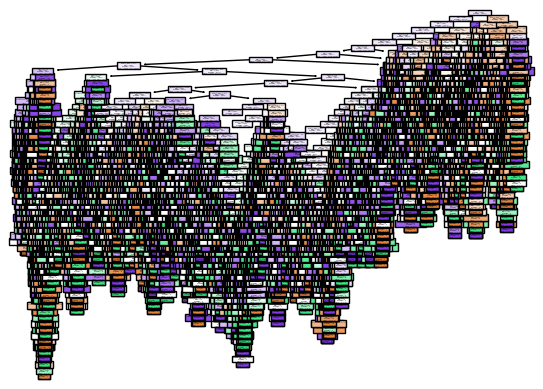

In [17]:
from sklearn import tree
t = tree.plot_tree(dtc, feature_names=X_train.columns, filled=True)
print("done")#fig.savefig("decision_tree.png")